In [1]:
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("ctg_studies_output.csv")
df

,nctId,briefTitle,officialTitle,orgStudyId,organizationName,organizationClass,overallStatus,whyStopped,statusVerifiedDate,startDate,...,primaryOutcomeMeasure,primaryOutcomeTimeFrame,eligibilityCriteria,sex,minimumAge,stdAges,locationCity,locationCountry,leadSponsorName,responsiblePartyType
0,NCT03473691,Pilot Study of Glembatumumab Vedotin Following...,Pilot Study of the Antibody-drug Conjugate Gle...,TBDBreast50,University of Virginia,OTHER,WITHDRAWN,Pharmaceutical company decided to withdraw fun...,2018-05,2018-05-01,...,Incidence of Adverse Events (AEs),Adverse events will be assessed from the time ...,Inclusion Criteria:\n\n1. Willingness and abil...,ALL,18 Years,"ADULT, OLDER_ADULT",NaN,NaN,University of Virginia,PRINCIPAL_INVESTIGATOR
1,NCT02115594,Phase 2 Study of Fulvestrant With and Without ...,"A Phase 2, Randomized, Double-Blind, Multicent...",SNDX-275-0305,Syndax Pharmaceuticals,INDUSTRY,WITHDRAWN,Internal decision,2014-04,2014-04,...,Progression Free Survival,From date of randomization until the date of 1...,Inclusion Criteria:\n\n* Patient is a female w...,FEMALE,NaN,"CHILD, ADULT, OLDER_ADULT",Nashville,United States,Syndax Pharmaceuticals,SPONSOR
2,NCT02458391,Complete Decongestive Therapy in Breast Cancer...,Therapeutic Quantity of Complete Decongestive ...,UIndianapolis,University of Indianapolis,OTHER,WITHDRAWN,No participants available,2018-10,2015-07,...,Change from baseline in impairments in functio...,At first treatment appointment (roughly week 1...,Inclusion Criteria:\n\n1. Have active unilater...,ALL,18 Years,"ADULT, OLDER_ADULT",NaN,NaN,University of Indianapolis,PRINCIPAL_INVESTIGATOR
3,NCT02783794,BP-C1 in Short-term Treatment of Patients With...,"A Randomized, Double Blind and Placebo Control...",BMC2011-1,Meabco A/S,INDUSTRY,COMPLETED,NaN,2019-10,2012-12-24,...,Change (%) in the sum of diameters of target l...,baseline to Day 32 of treatment,Inclusion Criteria:\n\nFemale patients with hi...,FEMALE,18 Years,"ADULT, OLDER_ADULT",Moscow,Russian Federation,Meabco A/S,SPONSOR
4,NCT03520894,Radiotherapy in Preoperative Setting With Cybe...,Radiotherapy in Preoperative Setting With Cybe...,ROCK,Azienda Ospedaliero-Universitaria Careggi,OTHER,UNKNOWN,NaN,2019-10,2018-05-01,...,"Rate of acute skin toxicity events, measured a...",15 days,Inclusion Criteria:\n\n1. Signed informed cons...,FEMALE,50 Years,"ADULT, OLDER_ADULT",Florence,Italy,Azienda Ospedaliero-Universitaria Careggi,PRINCIPAL_INVESTIGATOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,NCT01091454,Brostallicin and Cisplatin in Treating Patient...,Phase II Trial of Brostallicin and Cisplatin i...,N0937,Alliance for Clinical Trials in Oncology,OTHER,COMPLETED,NaN,2018-04,2010-06,...,3-month Progression-free Survival (3-mo PFS) Rate,3 months,Inclusion Criteria\n\n* Histologically or cyto...,ALL,18 Years,"ADULT, OLDER_ADULT",Scottsdale,United States,Alliance for Clinical Trials in Oncology,SPONSOR
13640,NCT00191854,Gemcitabine Combinations in Metastatic Breast ...,Randomized Phase II Study of Biweekly Gemcitab...,7451,Eli Lilly and Company,INDUSTRY,COMPLETED,NaN,2010-02,2005-03,...,Best Overall Response,baseline to measured progressive disease (tumo...,Inclusion Criteria:\n\n* Female patients with ...,FEMALE,18 Years,"ADULT, OLDER_ADULT",Santo André,Brazil,Eli Lilly and Company,NaN
13641,NCT03350854,Improving Decision Role Concordance in Newly D...,An Intervention to Improve Decision Role Conco...,IRB_00081898,University of Utah,OTHER,COMPLETED,NaN,2017-11,2016-03-07,...,Decision role concordance before and after a s...,The estimated period is 3 hours (before and im...,Inclusion Criteria:\n\n* All patients who pres...,FEMALE,18 Years,"ADULT, OLDER_ADULT",NaN,NaN,University of Utah,PRINCIPAL_INVESTIGATOR
13642,NCT00244933,Gemcitabine Hydrochloride and Genistein in Tre...,Phase II Trial of Gemcitabine and Genistein in...,2597,Barbara Ann Karmanos Cancer Institute,OTHER,COMPLETED,NaN,2023-05,2004-02,...,O

In [9]:
import json
import csv

# Path to the large JSON file
json_file_path = 'ctg-studies.json'
csv_file_path = 'ctg_studies_output.csv'

# Function to process the data
# This function takes in a study and extracts key information for further use
def process_study(study):
    # Extracting some key fields from the study object
    try:
        return {
            "nctId": study['protocolSection']['identificationModule'].get('nctId', 'N/A'),
            "briefTitle": study['protocolSection']['identificationModule'].get('briefTitle', 'N/A'),
            "officialTitle": study['protocolSection']['identificationModule'].get('officialTitle', 'N/A'),
            "orgStudyId": study['protocolSection']['identificationModule'].get('orgStudyIdInfo', {}).get('id', 'N/A'),
            "organizationName": study['protocolSection']['identificationModule'].get('organization', {}).get('fullName', 'N/A'),
            "organizationClass": study['protocolSection']['identificationModule'].get('organization', {}).get('class', 'N/A'),
            "overallStatus": study['protocolSection']['statusModule'].get('overallStatus', 'N/A'),
            "whyStopped": study['protocolSection']['statusModule'].get('whyStopped', 'N/A'),
            "statusVerifiedDate": study['protocolSection']['statusModule'].get('statusVerifiedDate', 'N/A'),
            "startDate": study['protocolSection']['statusModule'].get('startDateStruct', {}).get('date', 'N/A'),
            "primaryCompletionDate": study['protocolSection']['statusModule'].get('primaryCompletionDateStruct', {}).get('date', 'N/A'),
            "completionDate": study['protocolSection']['statusModule'].get('completionDateStruct', {}).get('date', 'N/A'),
            "conditions": ', '.join(study['protocolSection']['conditionsModule'].get('conditions', ['N/A'])),
            "studyType": study['protocolSection']['designModule'].get('studyType', 'N/A'),
            "phase": ', '.join(study['protocolSection']['designModule'].get('phases', ['N/A'])),
            "allocation": study['protocolSection']['designModule'].get('designInfo', {}).get('allocation', 'N/A'),
            "primaryPurpose": study['protocolSection']['designModule'].get('designInfo', {}).get('primaryPurpose', 'N/A'),
            "enrollmentCount": study['protocolSection']['designModule'].get('enrollmentInfo', {}).get('count', 'N/A'),
            "primaryOutcomeMeasure": study['protocolSection']['outcomesModule'].get('primaryOutcomes', [{}])[0].get('measure', 'N/A'),
            "primaryOutcomeTimeFrame": study['protocolSection']['outcomesModule'].get('primaryOutcomes', [{}])[0].get('timeFrame', 'N/A'),
            "eligibilityCriteria": study['protocolSection']['eligibilityModule'].get('eligibilityCriteria', 'N/A'),
            "sex": study['protocolSection']['eligibilityModule'].get('sex', 'N/A'),
            "minimumAge": study['protocolSection']['eligibilityModule'].get('minimumAge', 'N/A'),
            "stdAges": ', '.join(study['protocolSection']['eligibilityModule'].get('stdAges', ['N/A'])),
            "locationCity": study['protocolSection']['contactsLocationsModule'].get('locations', [{}])[0].get('city', 'N/A'),
            "locationCountry": study['protocolSection']['contactsLocationsModule'].get('locations', [{}])[0].get('country', 'N/A'),
            "leadSponsorName": study['protocolSection']['sponsorCollaboratorsModule'].get('leadSponsor', {}).get('name', 'N/A'),
            "responsiblePartyType": study['protocolSection']['sponsorCollaboratorsModule'].get('responsibleParty', {}).get('type', 'N/A')
        }
    except Exception as e:
        print(f"Error processing study: {e}")
        return None


# Open and read the entire JSON file, then write to CSV
with open(json_file_path, 'r') as json_file:
    try:
        # Load the entire JSON content
        data = json.load(json_file)
        
        with open(csv_file_path, 'w', newline='', encoding='utf-8') as csv_file:
            fieldnames = [
                "nctId", "briefTitle", "officialTitle", "orgStudyId", "organizationName", "organizationClass", "overallStatus",
                "whyStopped", "statusVerifiedDate", "startDate", "primaryCompletionDate", "completionDate", "conditions",
                "studyType", "phase", "allocation", "primaryPurpose", "enrollmentCount", "primaryOutcomeMeasure",
                "primaryOutcomeTimeFrame", "eligibilityCriteria", "sex", "minimumAge", "stdAges", "locationCity",
                "locationCountry", "leadSponsorName", "responsiblePartyType"
            ]
            csv_writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            csv_writer.writeheader()

            # Iterate over each study in the loaded data (assuming it's a list of studies)
            for study in data:
                processed_data = process_study(study)
                if processed_data:
                    csv_writer.writerow(processed_data)

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

print(f"CSV file has been created at: {csv_file_path}")


Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing 

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLo

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outco

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'contactsLocationsModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesMo

In [16]:
df = pd.read_csv("/Users/jingl1/Downloads/ctg_studies_output.csv")
df['eligibilityCriteria'][8]

"Inclusion Criteria:\n\n1. Female, Age ≥ 18 years\n2. Histologic or cytologic confirmation of human epidermal growth factor receptor 2 (HER2)-positive breast cancer according to most recent biopsy (local testing permitted)\n3. Measurable or evaluable metastatic disease by Response Evaluation Criteria in Solid Tumors (RECIST) (v1.1)\n4. Previous treatment with ado-trastuzumab emtansine (T-DM1) for metastatic disease\n\n   a. Prior therapy with pertuzumab is allowed but not required\n5. At least 1 but no more than 3 prior chemotherapy regimens for metastatic breast cancer (MBC)\n6. Life expectancy \\> 6 months\n7. Eastern Cooperative Group (ECOG) performance status ≤ 2\n8. Left Ventricular Ejection Fraction (LVEF) ≥ 50% at baseline as determined by either echocardiogram (ECHO) or Multi Gated Acquisition Scan (MUGA) and within normal limits per institutional guidelines\n9. Adequate bone marrow function as indicated by the following:\n\n   1. Absolute Neutrophil Count (ANC) ≥1500/uL (or 15

In [20]:
import json

# Path to the large JSON file
json_file_path = 'ctg-studies.json'
output_json_file_path = 'ctg_studies_cleaned.json'

# Function to process the data
# This function takes in a study and extracts key information for further use
def process_study(study):
    # Extracting some key fields from the study object
    try:
        return {
            "nctId": study['protocolSection']['identificationModule'].get('nctId', 'N/A'),
            "briefTitle": study['protocolSection']['identificationModule'].get('briefTitle', 'N/A'),
            "officialTitle": study['protocolSection']['identificationModule'].get('officialTitle', 'N/A'),
            "overallStatus": study['protocolSection']['statusModule'].get('overallStatus', 'N/A'),
            "conditions": ', '.join(study['protocolSection']['conditionsModule'].get('conditions', ['N/A'])),
            "studyType": study['protocolSection']['designModule'].get('studyType', 'N/A'),
            "phase": ', '.join(study['protocolSection']['designModule'].get('phases', ['N/A'])),
            "allocation": study['protocolSection']['designModule'].get('designInfo', {}).get('allocation', 'N/A'),
            "primaryPurpose": study['protocolSection']['designModule'].get('designInfo', {}).get('primaryPurpose', 'N/A'),
            "enrollmentCount": study['protocolSection']['designModule'].get('enrollmentInfo', {}).get('count', 'N/A'),
            "primaryOutcomeMeasure": study['protocolSection']['outcomesModule'].get('primaryOutcomes', [{}])[0].get('measure', 'N/A'),
            "eligibilityCriteria": study['protocolSection']['eligibilityModule'].get('eligibilityCriteria', 'N/A'),
            "sex": study['protocolSection']['eligibilityModule'].get('sex', 'N/A'),
            "minimumAge": study['protocolSection']['eligibilityModule'].get('minimumAge', 'N/A'),
            "stdAges": ', '.join(study['protocolSection']['eligibilityModule'].get('stdAges', ['N/A']))
        }
    except Exception as e:
        print(f"Error processing study: {e}")
        return None

# Open and read the entire JSON file, then write cleaned JSON
with open(json_file_path, 'r') as json_file:
    try:
        # Load the entire JSON content
        data = json.load(json_file)
        cleaned_data = []

        # Iterate over each study in the loaded data (assuming it's a list of studies)
        for study in data:
            processed_data = process_study(study)
            if processed_data:
                cleaned_data.append(processed_data)

        # Write the cleaned data to a new JSON file, each study in one line
        with open(output_json_file_path, 'w', encoding='utf-8') as output_file:
            for entry in cleaned_data:
                output_file.write(json.dumps(entry) + ',\n')

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

print(f"Cleaned JSON file has been created at: {output_json_file_path}")


Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing

Cleaned JSON file has been created at: ctg_studies_cleaned.json


In [21]:
import json

# Path to the large JSON file
json_file_path = 'ctg-studies.json'
output_json_file_path = 'ctg_studies_cleaned.json'


# Function to process the data
# This function takes in a study and extracts key information for further use
def process_study(study):
    # Extracting some key fields from the study object
    try:
        return {
            "nctId": study['protocolSection']['identificationModule'].get('nctId', 'N/A'),
            "briefTitle": study['protocolSection']['identificationModule'].get('briefTitle', 'N/A'),
            "officialTitle": study['protocolSection']['identificationModule'].get('officialTitle', 'N/A'),
            "overallStatus": study['protocolSection']['statusModule'].get('overallStatus', 'N/A'),
            "conditions": ', '.join(study['protocolSection']['conditionsModule'].get('conditions', ['N/A'])),
            "studyType": study['protocolSection']['designModule'].get('studyType', 'N/A'),
            "phase": ', '.join(study['protocolSection']['designModule'].get('phases', ['N/A'])),
            "allocation": study['protocolSection']['designModule'].get('designInfo', {}).get('allocation', 'N/A'),
            "primaryPurpose": study['protocolSection']['designModule'].get('designInfo', {}).get('primaryPurpose', 'N/A'),
            "enrollmentCount": study['protocolSection']['designModule'].get('enrollmentInfo', {}).get('count', 'N/A'),
            "primaryOutcomeMeasure": study['protocolSection']['outcomesModule'].get('primaryOutcomes', [{}])[0].get('measure', 'N/A'),
            "eligibilityCriteria": study['protocolSection']['eligibilityModule'].get('eligibilityCriteria', 'N/A'),
            "sex": study['protocolSection']['eligibilityModule'].get('sex', 'N/A'),
            "minimumAge": study['protocolSection']['eligibilityModule'].get('minimumAge', 'N/A'),
            "stdAges": ', '.join(study['protocolSection']['eligibilityModule'].get('stdAges', ['N/A']))
        }
    except Exception as e:
        print(f"Error processing study: {e}")
        return None

# Open and read the entire JSON file, then write cleaned JSON
with open(json_file_path, 'r') as json_file:
    try:
        # Load the entire JSON content
        data = json.load(json_file)
        cleaned_data = []
        lengths = []

        # Iterate over each study in the loaded data (assuming it's a list of studies)
        for study in data:
            processed_data = process_study(study)
            if processed_data:
                cleaned_data.append(processed_data)
                lengths.append(len(json.dumps(processed_data)))

        # Write the cleaned data to a new JSON file, each study in one line
        with open(output_json_file_path, 'w', encoding='utf-8') as output_file:
            for entry in cleaned_data:
                output_file.write(json.dumps(entry) + '\n')

        # Print the range of lengths of each JSON object
        if lengths:
            print(f"Minimum length: {min(lengths)} characters")
            print(f"Maximum length: {max(lengths)} characters")

    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

print(f"Cleaned JSON file has been created at: {output_json_file_path}")


Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Minimum length: 515 characters
Maximum length: 22043 characters
Cleaned JSON file has been created at: ctg_studies_cleaned.json


In [23]:
import matplotlib.pyplot as plt

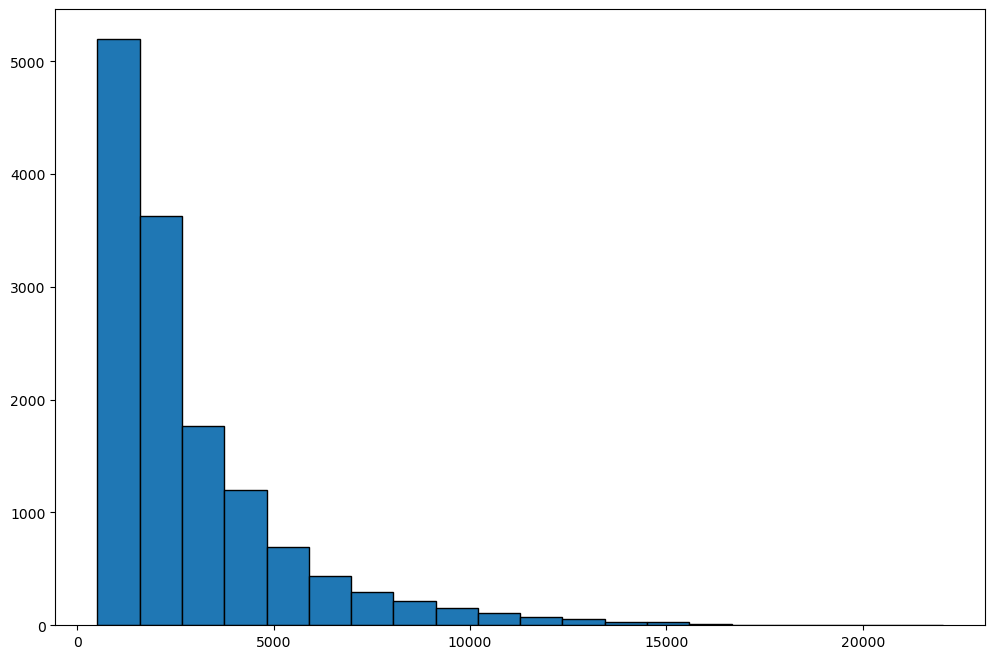

In [27]:
plt.figure(figsize=(12, 8))
plt.hist(lengths,bins=20, edgecolor='black')
plt.show()

In [30]:
import json
import matplotlib.pyplot as plt
import os

# Path to the large JSON file
json_file_path = 'ctg-studies.json'
output_json_dir = 'ctg_studies_individual/'

# Create output directory if it does not exist
os.makedirs(output_json_dir, exist_ok=True)

# Function to process the data
# This function takes in a study and extracts key information for further use
def process_study(study):
    # Extracting some key fields from the study object
    try:
        return {
            "nctId": study['protocolSection']['identificationModule'].get('nctId', 'N/A'),
            "briefTitle": study['protocolSection']['identificationModule'].get('briefTitle', 'N/A'),
            "officialTitle": study['protocolSection']['identificationModule'].get('officialTitle', 'N/A'),
            "overallStatus": study['protocolSection']['statusModule'].get('overallStatus', 'N/A'),
            "conditions": ', '.join(study['protocolSection']['conditionsModule'].get('conditions', ['N/A'])),
            "studyType": study['protocolSection']['designModule'].get('studyType', 'N/A'),
            "phase": ', '.join(study['protocolSection']['designModule'].get('phases', ['N/A'])),
            "allocation": study['protocolSection']['designModule'].get('designInfo', {}).get('allocation', 'N/A'),
            "primaryPurpose": study['protocolSection']['designModule'].get('designInfo', {}).get('primaryPurpose', 'N/A'),
            "enrollmentCount": study['protocolSection']['designModule'].get('enrollmentInfo', {}).get('count', 'N/A'),
            "primaryOutcomeMeasure": study['protocolSection']['outcomesModule'].get('primaryOutcomes', [{}])[0].get('measure', 'N/A'),
            "eligibilityCriteria": study['protocolSection']['eligibilityModule'].get('eligibilityCriteria', 'N/A'),
            "sex": study['protocolSection']['eligibilityModule'].get('sex', 'N/A'),
            "minimumAge": study['protocolSection']['eligibilityModule'].get('minimumAge', 'N/A'),
            "stdAges": ', '.join(study['protocolSection']['eligibilityModule'].get('stdAges', ['N/A']))
        }
    except Exception as e:
        print(f"Error processing study: {e}")
        return None

# Open and read the entire JSON file, then write individual JSON files
with open(json_file_path, 'r') as json_file:
    try:
        # Load the entire JSON content
        data = json.load(json_file)
        lengths = []

        # Iterate over each study in the loaded data (assuming it's a list of studies)
        for index, study in enumerate(data):
            processed_data = process_study(study)
            if processed_data:
                # Use nctId as the filename
                nct_id = processed_data.get('nctId', f"study_{index + 1}")
                individual_file_path = os.path.join(output_json_dir, f"{nct_id}.json")
                with open(individual_file_path, 'w', encoding='utf-8') as individual_file:
                    json.dump(processed_data, individual_file, indent=4)
                lengths.append(len(json.dumps(processed_data)))

  
    except json.JSONDecodeError as e:
        print(f"Error decoding JSON: {e}")

print(f"Individual JSON files have been created in: {output_json_dir}")

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing

Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing study: 'outcomesModule'
Error processing